## Geração dos dados

In [38]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
nivel_mistura = 0.5
n_pontos_por_classe = 50
n_total = n_pontos_por_classe * 2

x = np.random.uniform(0, 1, n_total)
y = np.random.uniform(0, 1, n_total)

dist_11 = np.sqrt((x - 1)**2 + (y - 1)**2)
dist_00 = np.sqrt((x - 0)**2 + (y - 0)**2)

prob_classe_1 = (dist_00 - dist_11 + np.random.normal(0, nivel_mistura, n_total)) / 2

indices_ordenados = np.argsort(prob_classe_1)

labels = np.ones(n_total) * -1
labels[indices_ordenados[-n_pontos_por_classe:]] = 1

X = np.column_stack((x, y))
Y = labels

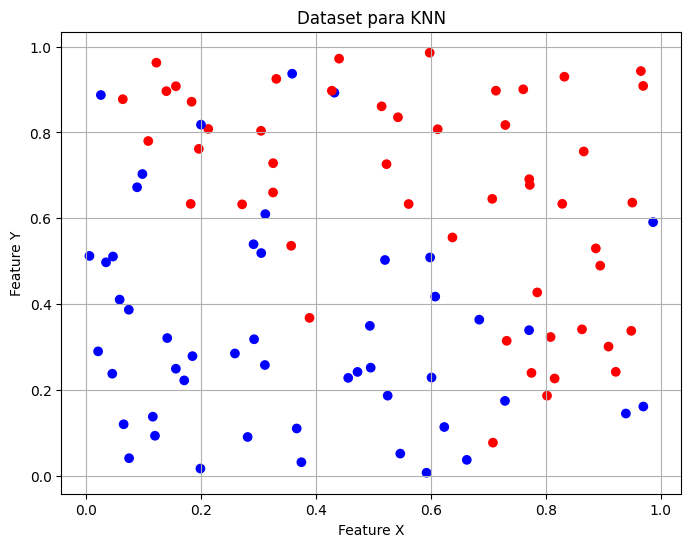

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', marker='o')
plt.title('Dataset para KNN')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()

In [43]:
k = 9
xt = np.array([0.5, 0.5]).reshape(2,1)


In [61]:
def knn(X, Y, xt, k):
    dist = (((X.T-xt).T)**2).sum(axis=1)
    pred = np.sign(labels[dist.argsort()[:k]].sum())
    return pred

In [63]:
knn(X, Y, xt, k)

-1.0

In [84]:
k=3

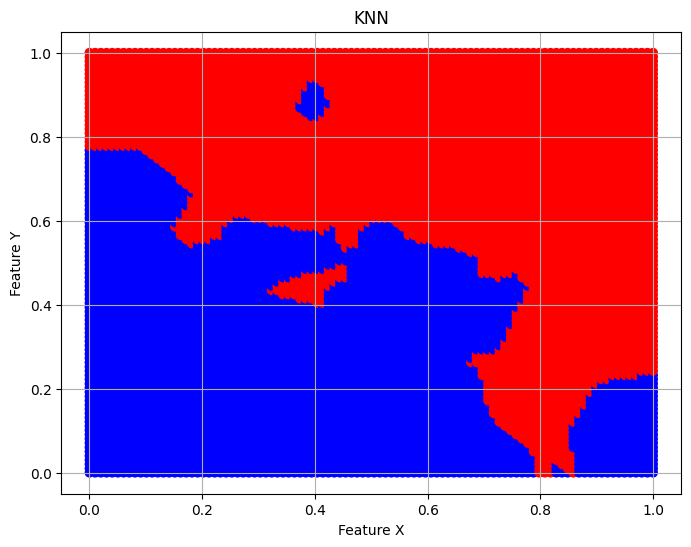

In [85]:
results_coords = []
results_labels = []
for i in np.linspace(0, 1, 100):
    for j in np.linspace(0, 1, 100):
        xt = np.array([i, j])
        results_coords.append(xt)
        label = knn(X, Y, xt.reshape(2,1), k)
        results_labels.append(label)

results_coords = np.array(results_coords)
plt.figure(figsize=(8, 6))
plt.scatter(results_coords[:, 0], results_coords[:, 1], c=results_labels, cmap='bwr', marker='o')
plt.title('KNN')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()